<a href="https://colab.research.google.com/github/Pree-om/deep-learning/blob/main/NaiveForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/gakudo-ai/open-datasets/refs/heads/main/CTA_-_Ridership_-_Daily_Boarding_Totals.csv')

In [3]:
df.head()

,service_date,day_type,bus,rail_boardings,total_rides
0,01/01/2001,U,297192,126455,423647
1,01/02/2001,W,780827,501952,1282779
2,01/03/2001,W,824923,536432,1361355
3,01/04/2001,W,870021,550011,1420032
4,01/05/2001,W,890426,557917,1448343


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   service_date    8036 non-null   object
 1   day_type        8036 non-null   object
 2   bus             8036 non-null   int64 
 3   rail_boardings  8036 non-null   int64 
 4   total_rides     8036 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 314.0+ KB


In [5]:
df.describe()

,bus,rail_boardings,total_rides
count,8.036000e+03,8.036000e+03,8.036000e+03
mean,7.371482e+05,5.304540e+05,1.267602e+06
std,2.683072e+05,2.081987e+05,4.619967e+05
min,8.078300e+04,2.354400e+04,1.100470e+05
25%,4.752640e+05,3.381960e+05,8.274748e+05
50%,8.199680e+05,6.020015e+05,1.506496e+06
75%,9.712272e+05,7.069602e+05,1.644321e+06
max,1.211992e+06,1.146516e+06,2.049519e+06


In [7]:
df.tail()

,service_date,day_type,bus,rail_boardings,total_rides
8031,10/27/2022,W,528826,395129,923955
8032,10/28/2022,W,501985,352842,854827
8033,10/29/2022,A,311437,254149,565586
8034,10/30/2022,U,217204,177961,395165
8035,10/31/2022,W,454862,318942,773804


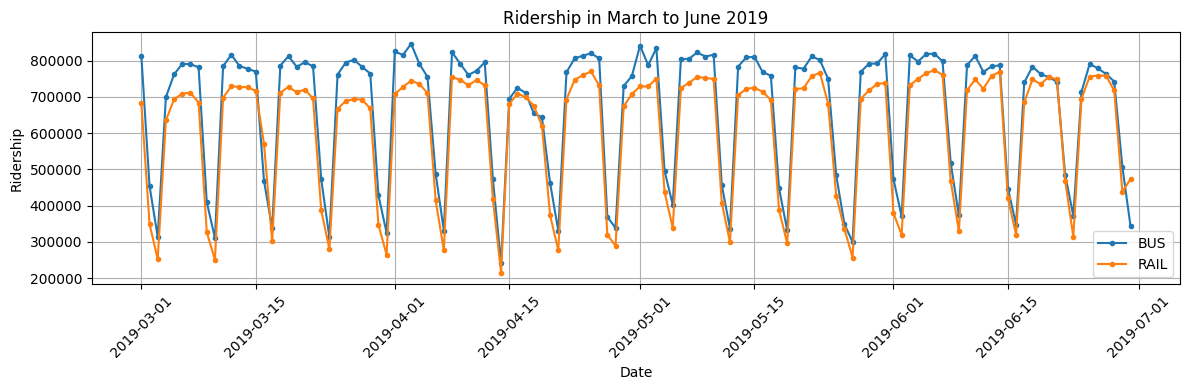

In [14]:
#Convert the date column to datetime objects
df['data'] = pd.to_datetime(df['service_date'])

march_to_june_2019 = df[(df['data'] >= '2019-03-01') & (df['data'] <= '2019-06-30')]

#Create the plot
plt.figure(figsize=(12,4))
plt.plot(march_to_june_2019['data'], march_to_june_2019['bus'], label='BUS', marker='.')
plt.plot(march_to_june_2019['data'], march_to_june_2019['rail_boardings'], label='RAIL', marker='.')

plt.xlabel('Date')
plt.ylabel('Ridership')
plt.title('Ridership in March to June 2019')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
#Performing naive forecast
march_to_june_2019_nf = march_to_june_2019.shift(7)
difference = march_to_june_2019[["bus","rail_boardings"]].diff(7)

<ipython-input-23-58300c3a2d3a>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-23-58300c3a2d3a>:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


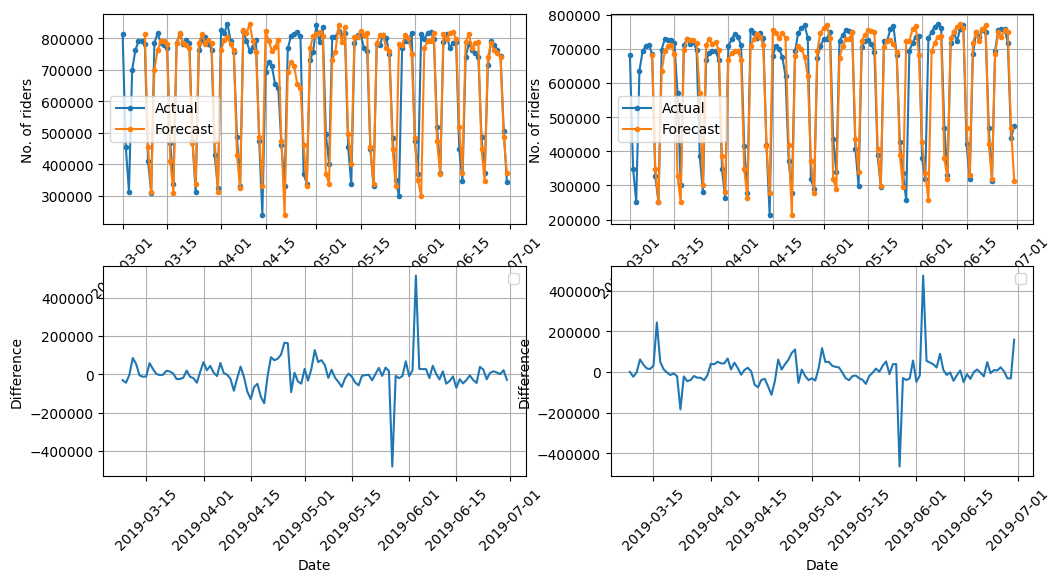

In [23]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.plot(march_to_june_2019['data'], march_to_june_2019['bus'], label='Actual', marker='.')
plt.plot(march_to_june_2019['data'], march_to_june_2019_nf['bus'], label='Forecast', marker='.')
plt.grid()
plt.xlabel('Date')
plt.ylabel('No. of riders')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(2,2,2)
plt.plot(march_to_june_2019['data'], march_to_june_2019['rail_boardings'], label='Actual', marker='.')
plt.plot(march_to_june_2019['data'], march_to_june_2019_nf['rail_boardings'], label='Forecast', marker='.')
plt.grid()
plt.xlabel('Date')
plt.ylabel('No. of riders')
plt.xticks(rotation=45)
plt.legend()


plt.subplot(2,2,3)
plt.plot(march_to_june_2019['data'], difference['bus'])
plt.grid()
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(2,2,4)
plt.plot(march_to_june_2019['data'], difference['rail_boardings'])
plt.grid()
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45)
plt.legend()

In [18]:
MAE = difference.abs().mean()
print(MAE)

bus               44580.478261
rail_boardings    44339.513043
dtype: float64


In [19]:
MAPE = (difference/march_to_june_2019[["bus","rail_boardings"]]).abs().mean()
print(MAPE) #ERROR of ~8%

bus               0.080059
rail_boardings    0.089568
dtype: float64
